In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [89]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.cost_history = []

    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-z))

    def cost(self, h, y):
        """Cross-entropy loss"""
        m = len(y)
        return - (1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

    def fit(self, X, y):
        """Train model using gradient descent"""
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.iterations):
            h = self.sigmoid(np.dot(X, self.weights) + self.bias)

            dw = (1/m) * np.dot(X.T, (h - y))
            db = (1/m) * np.sum(h - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost(h, y))

        return self.weights, self.bias

    def predict(self, X):
        """Make predictions"""
        return (self.sigmoid(np.dot(X, self.weights)
                             + self.bias) >= 0.5).astype(int)

    def predict_arguments(self, X, weights, bias):
        """Make predictions"""
        return self.sigmoid(np.dot(X, weights) + bias)
    
    def predict_sgd(self, X):
        """Make predictions"""
        m = X.shape[0]
        X_bias = np.c_[np.ones((m, 1)), X]
        return (self.sigmoid(np.dot(X_bias, self.weights)
                             + self.bias) >= 0.5).astype(int)

    def sgd(self, X, y, batch_size=1):
        m, n = X.shape
        self.weights = np.zeros(n + 1) 
        X_bias = np.c_[np.ones((m, 1)), X]

        for epoch in range(self.iterations):
            indices = np.random.permutation(m)
            X_shuffled = X_bias[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                h = self.sigmoid(np.dot(X_batch, self.weights))
                dw = (1/m) * np.dot(X_batch.T, (h - y_batch))

                self.weights -= self.lr * dw

            h_all = self.sigmoid(np.dot(X_bias, self.weights))
            cost = self.cost(h_all, y)
            self.cost_history.append(cost)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cost: {cost}")

In [87]:
def LogisticRegression(file: str):
    df = pd.read_csv(file)
    imputer = SimpleImputer(strategy="mean")

    houses = ["Gryffindor", "Slytherin", "Ravenclaw", "Hufflepuff"]

    X = df.drop(['Index', 'Hogwarts House', 'First Name', 'Last Name',
                  'Birthday', 'Best Hand', 'Arithmancy',
                  'Care of Magical Creatures'], axis=1)
    X = imputer.fit_transform(X)

    X_train, X_test, y_train_global, y_test_global = train_test_split(
        X, df["Hogwarts House"].values, test_size=0.2, random_state=42
    )

    models = {}
    for house in houses:
        y_train = np.array([1 if i == house else 0 for i in y_train_global])

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
        model.fit(X_train, y_train)

        plt.plot(model.cost_history)
        plt.title("Cost Function Convergence")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.grid(True)
        plt.show()
        models[house] = (model, scaler)


    house_preds = []
    for idx in range(X_test.shape[0]):
        probas = []
        for house in houses:
            model, scaler = models[house]
            x = X_test[idx].reshape(1, -1)
            proba = model.predict(x)[0]
            probas.append(proba)
        best_house_idx = np.argmax(probas)
        house_preds.append(houses[best_house_idx])

    accuracy = np.mean(house_preds == y_test_global)
    print(f"Model Accuracy: {accuracy:.2f}")

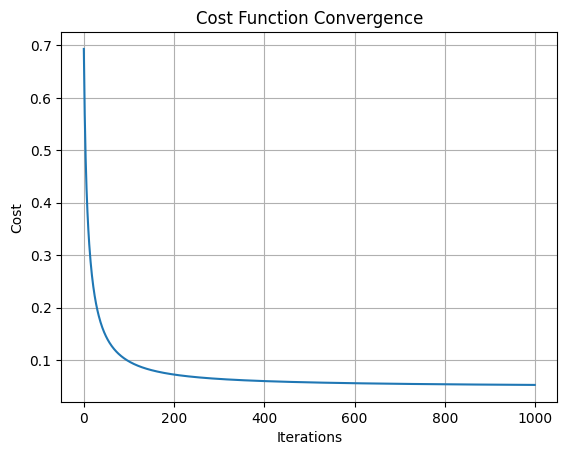

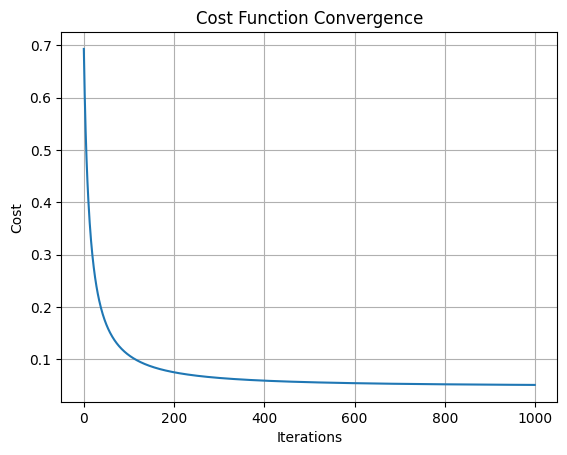

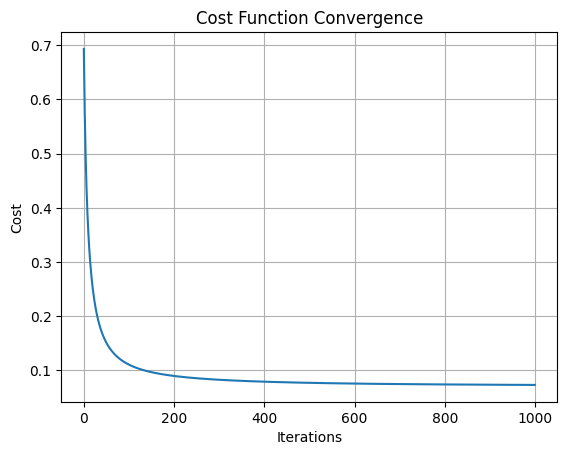

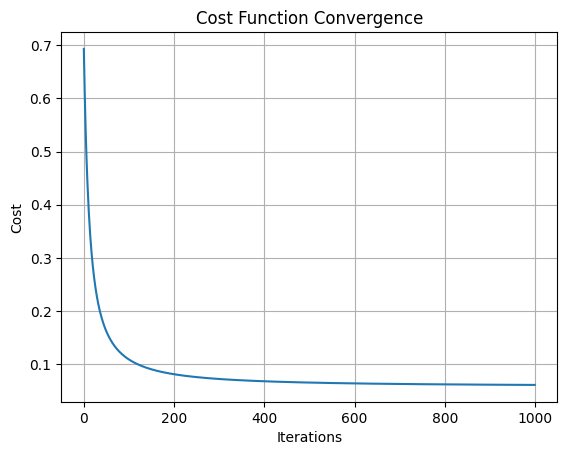

shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of weights: (11,)
shapes of X: (1, 11)
shapes of wei

In [88]:
LogisticRegression("datasets/dataset_train.csv")

In [33]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  
y = 4 + 3 * X + np.random.randn(100, 1)

theta_final, cost_history = sgd(X, y, learning_rate=0.1, iterations=1000, batch_size=1)

Epoch 0, Cost: 1.581821686856939
Epoch 100, Cost: 1.5664692700155733
Epoch 200, Cost: 1.4445422391173144
Epoch 300, Cost: 1.7037674963102662
Epoch 400, Cost: 0.9101999515899212
Epoch 500, Cost: 0.8184497904316664
Epoch 600, Cost: 0.8352333304446237
Epoch 700, Cost: 0.8542729530055074
Epoch 800, Cost: 1.0508310318687628
Epoch 900, Cost: 0.8261971232182218


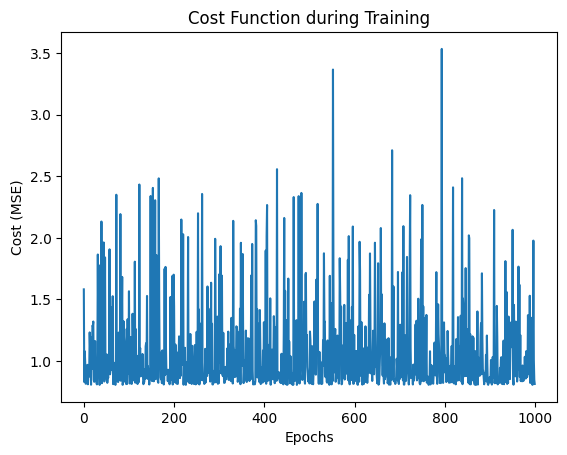

In [35]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function during Training')
plt.show()

In [94]:
def LogisticRegression(file: str):
    df = pd.read_csv(file)
    imputer = SimpleImputer(strategy="mean")

    houses = ["Gryffindor", "Slytherin", "Ravenclaw", "Hufflepuff"]

    X = df.drop(['Index', 'Hogwarts House', 'First Name', 'Last Name',
                  'Birthday', 'Best Hand', 'Arithmancy',
                  'Care of Magical Creatures'], axis=1)
    X = imputer.fit_transform(X)

    X_train, X_test, y_train_global, y_test_global = train_test_split(
        X, df["Hogwarts House"].values, test_size=0.2, random_state=42
    )

    models = {}
    for house in houses:
        y_train = np.array([1 if i == house else 0 for i in y_train_global])

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000)
        model.sgd(X_train, y_train)

        plt.plot(model.cost_history)
        plt.title("Cost Function Convergence")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.grid(True)
        plt.show()
        models[house] = (model, scaler)


    house_preds = []
    for idx in range(X_test.shape[0]):
        probas = []
        for house in houses:
            model, scaler = models[house]
            x = X_test[idx].reshape(1, -1)
            proba = model.predict_sgd(x)[0]
            probas.append(proba)
        best_house_idx = np.argmax(probas)
        house_preds.append(houses[best_house_idx])

    accuracy = np.mean(house_preds == y_test_global)
    print(f"Model Accuracy: {accuracy:.2f}")

Epoch 0, Cost: 0.6273408193536402
Epoch 100, Cost: 0.09766017759116094
Epoch 200, Cost: 0.07262899188279313
Epoch 300, Cost: 0.06429033633191117
Epoch 400, Cost: 0.06018663825266729
Epoch 500, Cost: 0.05774812525405842
Epoch 600, Cost: 0.05612895684340147
Epoch 700, Cost: 0.05497397488986288
Epoch 800, Cost: 0.054108736663730894
Epoch 900, Cost: 0.053437139437685


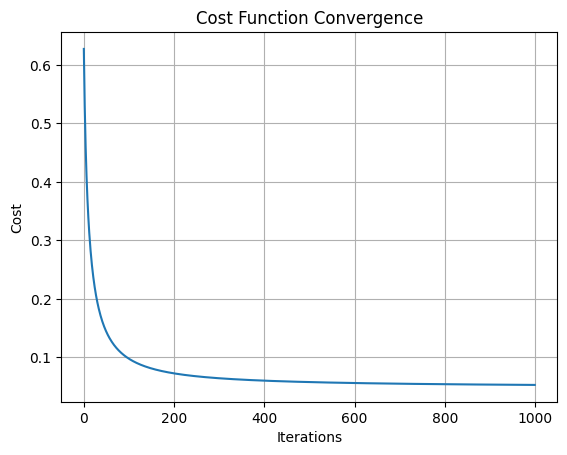

Epoch 0, Cost: 0.6473314796295844
Epoch 100, Cost: 0.10774581339853473
Epoch 200, Cost: 0.0752917604940886
Epoch 300, Cost: 0.06446906508784711
Epoch 400, Cost: 0.059280438031742926
Epoch 500, Cost: 0.056324858241808176
Epoch 600, Cost: 0.054458925329922636
Epoch 700, Cost: 0.0531963840111305
Epoch 800, Cost: 0.052297918473526696
Epoch 900, Cost: 0.05163334822110284


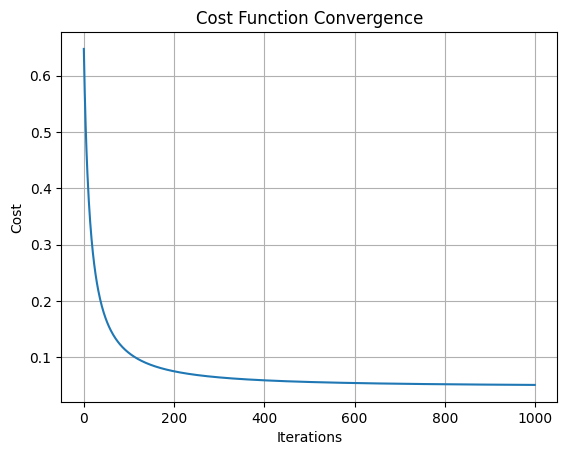

Epoch 0, Cost: 0.6323280973196383
Epoch 100, Cost: 0.11063810851582052
Epoch 200, Cost: 0.0897469512768051
Epoch 300, Cost: 0.08271826223060477
Epoch 400, Cost: 0.0791732649187092
Epoch 500, Cost: 0.07706131132210176
Epoch 600, Cost: 0.07569059163880872
Epoch 700, Cost: 0.07475155230195947
Epoch 800, Cost: 0.07408210834369633
Epoch 900, Cost: 0.07358935511638491


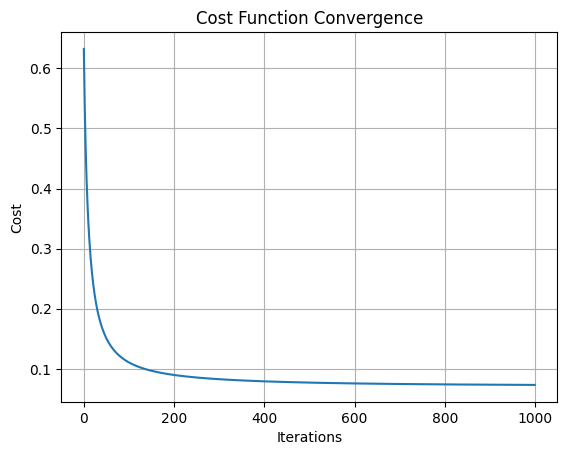

Epoch 0, Cost: 0.650196757039442
Epoch 100, Cost: 0.10902648025419844
Epoch 200, Cost: 0.08134278573253245
Epoch 300, Cost: 0.07235938749693982
Epoch 400, Cost: 0.06807030024957486
Epoch 500, Cost: 0.0656148502638729
Epoch 600, Cost: 0.0640506660634382
Epoch 700, Cost: 0.06298165932448457
Epoch 800, Cost: 0.06221391165444571
Epoch 900, Cost: 0.061641861088564766


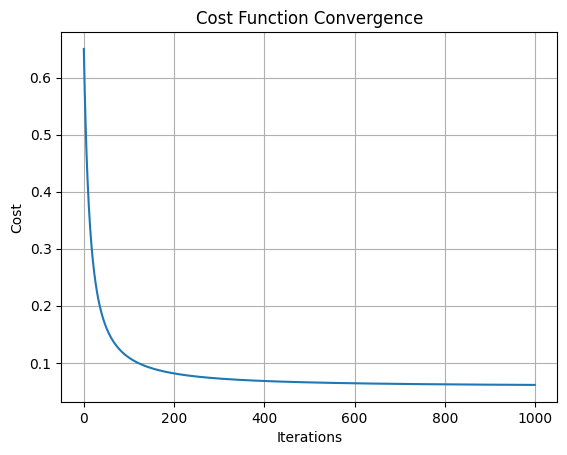

Model Accuracy: 0.99


In [95]:
LogisticRegression("datasets/dataset_train.csv")